# Plotting Query Results

## Setup

In [1]:
# Import dependencies
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

import pandas as pd

from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [2]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)

## Explore Database

In [3]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)

In [4]:
# Use Inspector to print the column names and types
inspector.get_table_names()

['emoji']

In [5]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
emoji_sql = engine.execute("SELECT * FROM emoji LIMIT 10")

for row in emoji_sql:
    print(row)

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect database and Query

In [6]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [7]:
# Start a session to query the database
session = Session(engine)
Emojis = Base.classes.emoji

In [8]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
results = []

for id in session.query(Emojis.score, Emoji.emoji_id):
    results.append(id)
    print(id)

#Order by score
results = sorted(results)

(1814832150, '1F602')
(840619939, '2764')
(680382416, '1F60D')
(652715459, '2665')
(515991922, '1F62D')
(484540701, '1F60A')
(452489849, '267B')
(441690175, '1F612')
(381679908, '1F495')
(377847645, '1F618')
(343967555, '1F629')
(333263710, '263A')
(311468371, '1F44C')
(283873968, '1F614')
(275930731, '1F60F')
(268504794, '1F601')
(225109999, '2B05')
(210995480, '1F609')
(186214004, '1F44D')
(180720579, '1F60C')
(175057316, '1F64F')
(170127733, '1F3B6')
(166417040, '1F622')
(160872106, '1F60E')
(160434523, '1F605')
(159984970, '1F440')
(156664610, '1F633')
(154175844, '1F64C')
(152572644, '1F494')
(148162690, '1F648')
(143975239, '270C')
(139984564, '2728')
(139339131, '1F499')
(137264417, '1F49C')
(134780880, '1F4AF')
(130865258, '1F634')
(130477038, '1F604')
(130424962, '1F496')
(128234168, '1F611')
(117379741, '1F615')
(116339825, '1F61C')
(114838048, '1F61E')
(112633851, '1F60B')
(108324223, '1F62A')
(106264072, '1F610')
(102799918, '1F44F')
(101184223, '1F497')
(100755958, '1F525'

In [9]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
score = []
ids = []
for x in results:
    score.append(x[0])
    ids.append(x[1])

#limit to top 10
score_top_10 = score[:10]
ids_top_10 = ids[:10]

## Plot using Matplotlib

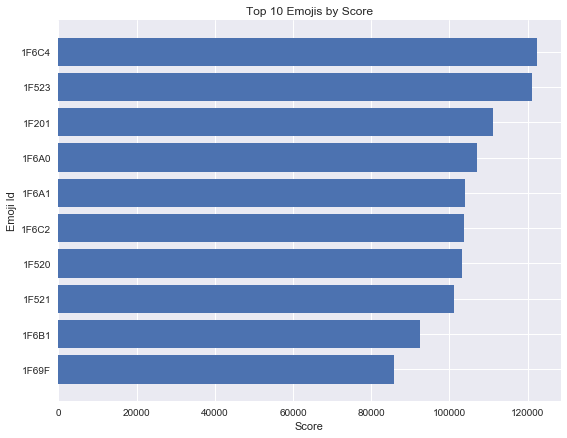

In [10]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
plt.figure(figsize=(9,7))
plt.barh(ids_top_10,score_top_10)
plt.xlabel('Score')
plt.ylabel('Emoji Id')
plt.title('Top 10 Emojis by Score')
plt.show()

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [11]:
# Load the results into a pandas dataframe. 
emoji_df = pd.read_sql("SELECT * FROM emoji", engine)
emoji_df = emoji_df.sort_values('score')

#limit to top 10
emoji_df = emoji_df.head(10)

Plot using Pandas

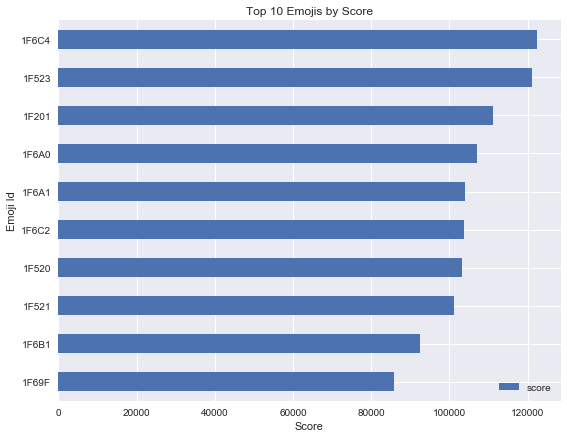

In [12]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
emoji_df.plot(kind='barh', y='score', x='emoji_id', figsize=(9,7))  
plt.xlabel('Score')
plt.ylabel('Emoji Id')
plt.title('Top 10 Emojis by Score')
plt.show()